In [ ]:
'''

Assignment 2

Data Wrangling II
Create an “Academic performance” dataset of students and perform the following operations using Python.
1. Scan all variables for missing values and inconsistencies. If there are missing values and/or
inconsistencies, use any of the suitable techniques to deal with them.
2. Scan all numeric variables for outliers. If there are outliers, use any of the suitable
techniques to deal with them.
3. Apply data transformations on at least one of the variables. The purpose of this
transformation should be one of the following reasons: to change the scale for better
understanding of the variable, to convert a non-linear relation into a linear one, or to
decrease the skewness and convert the distribution into a normal distribution.
Reason and document your approach properly.

'''

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_excel('StudentsPerformanceTest1.xlsx')

In [4]:
df

,gender,math score,reading score,writing score,Placement Score,placement offer count,Region
0,female,72.0,72.0,74.0,78.0,1,Pune
1,female,69.0,90.0,88.0,NaN,2,NaN
2,female,90.0,95.0,93.0,74.0,2,Nashik
3,male,47.0,57.0,NaN,78.0,1,NaN
4,male,NaN,78.0,75.0,81.0,3,Pune
5,female,71.0,NaN,78.0,70.0,4,NaN
6,male,12.0,44.0,52.0,12.0,2,Nashik
7,male,NaN,65.0,67.0,49.0,1,Pune
8,male,5.0,77.0,89.0,55.0,0,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 9 non-null      object 
 1   math score             7 non-null      float64
 2   reading score          8 non-null      float64
 3   writing score          8 non-null      float64
 4   Placement Score        8 non-null      float64
 5   placement offer count  9 non-null      int64  
 6   Region                 5 non-null      object 
dtypes: float64(4), int64(1), object(2)
memory usage: 632.0+ bytes


In [6]:
df.isnull()

,gender,math score,reading score,writing score,Placement Score,placement offer count,Region
0,False,False,False,False,False,False,False
1,False,False,False,False,True,False,True
2,False,False,False,False,False,False,False
3,False,False,False,True,False,False,True
4,False,True,False,False,False,False,False
5,False,False,True,False,False,False,True
6,False,False,False,False,False,False,False
7,False,True,False,False,False,False,False
8,False,False,False,False,False,False,True


In [7]:
df.notnull()

,gender,math score,reading score,writing score,Placement Score,placement offer count,Region
0,True,True,True,True,True,True,True
1,True,True,True,True,False,True,False
2,True,True,True,True,True,True,True
3,True,True,True,False,True,True,False
4,True,False,True,True,True,True,True
5,True,True,False,True,True,True,False
6,True,True,True,True,True,True,True
7,True,False,True,True,True,True,True
8,True,True,True,True,True,True,False


In [8]:
series = pd.isnull(df['math score'])

In [9]:
df[series]

,gender,math score,reading score,writing score,Placement Score,placement offer count,Region
4,male,NaN,78.0,75.0,81.0,3,Pune
7,male,NaN,65.0,67.0,49.0,1,Pune


In [10]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [11]:
df['gender'] = le.fit_transform(df['gender'])

In [12]:
df

,gender,math score,reading score,writing score,Placement Score,placement offer count,Region
0,0,72.0,72.0,74.0,78.0,1,Pune
1,0,69.0,90.0,88.0,NaN,2,NaN
2,0,90.0,95.0,93.0,74.0,2,Nashik
3,1,47.0,57.0,NaN,78.0,1,NaN
4,1,NaN,78.0,75.0,81.0,3,Pune
5,0,71.0,NaN,78.0,70.0,4,NaN
6,1,12.0,44.0,52.0,12.0,2,Nashik
7,1,NaN,65.0,67.0,49.0,1,Pune
8,1,5.0,77.0,89.0,55.0,0,NaN


In [13]:
df2=df

df2

,gender,math score,reading score,writing score,Placement Score,placement offer count,Region
0,0,72.0,72.0,74.0,78.0,1,Pune
1,0,69.0,90.0,88.0,NaN,2,NaN
2,0,90.0,95.0,93.0,74.0,2,Nashik
3,1,47.0,57.0,NaN,78.0,1,NaN
4,1,NaN,78.0,75.0,81.0,3,Pune
5,0,71.0,NaN,78.0,70.0,4,NaN
6,1,12.0,44.0,52.0,12.0,2,Nashik
7,1,NaN,65.0,67.0,49.0,1,Pune
8,1,5.0,77.0,89.0,55.0,0,NaN


In [14]:
df2.isnull().sum()

gender                   0
math score               2
reading score            1
writing score            1
Placement Score          1
placement offer count    0
Region                   4
dtype: int64

In [15]:
df2.isna().sum()

gender                   0
math score               2
reading score            1
writing score            1
Placement Score          1
placement offer count    0
Region                   4
dtype: int64

In [16]:
df2.mean()

/tmp/ipykernel_44924/3587575296.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df2.mean()


gender                    0.555556
math score               52.285714
reading score            72.250000
writing score            77.000000
Placement Score          62.125000
placement offer count     1.777778
dtype: float64

In [19]:
df['math score'].fillna(52.285714, axis=0, inplace=True)
df['reading score'].fillna(72.250000, axis=0, inplace=True)
df['writing score'].fillna(77.000000, axis=0, inplace=True)
df['Placement Score'].fillna(62.125000, axis=0, inplace=True)
df['placement offer count'].fillna(1.777778, axis=0, inplace=True)


In [20]:
df

,gender,math score,reading score,writing score,Placement Score,placement offer count,Region
0,0,72.000000,72.00,74.0,78.000,1,Pune
1,0,69.000000,90.00,88.0,62.125,2,NaN
2,0,90.000000,95.00,93.0,74.000,2,Nashik
3,1,47.000000,57.00,77.0,78.000,1,NaN
4,1,52.285714,78.00,75.0,81.000,3,Pune
5,0,71.000000,72.25,78.0,70.000,4,NaN
6,1,12.000000,44.00,52.0,12.000,2,Nashik
7,1,52.285714,65.00,67.0,49.000,1,Pune
8,1,5.000000,77.00,89.0,55.000,0,NaN


<IPython.core.display.Javascript object>

<AxesSubplot: xlabel='reading score'>

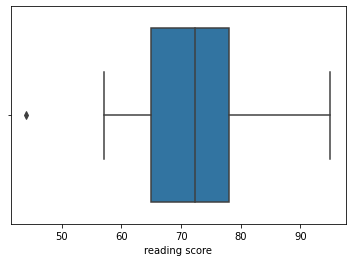

In [21]:
sns.boxplot(data=df, x='reading score')

In [ ]:
sns.boxplot()